# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Viddy Virstandi Paramanayaka Andanawari Purnama
- **Email:** viddyvirstandi28@gmail.com
- **ID Dicoding:** viddypurnama

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda mencapai puncaknya dan kapan terjadi penurunan paling signifikan pada hari kerja dan hari libur?
- Seberapa besar perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana pola penyewaan sepeda berdasarkan musim yang berbeda?
- Apakah terdapat hubungan yang signifikan antara suhu udara dengan jumlah penyewa sepeda?
- Bagaimana tren penyewaan sepeda dalam enam bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [31]:
#Import semua library
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import warnings
from matplotlib.ticker import MaxNLocator
#Memperindah visual dengan ignore futurewarning
warnings.simplefilter(action="ignore", category=FutureWarning)

## Data Wrangling

### Gathering Data

#### dataset_hour

In [32]:
#membaca csv dalam folder
dataset_hour = pd.read_csv("/content/hour.csv")

# Display the first few rows
dataset_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### dataset_day

In [33]:
#membaca csv dalam folder
dataset_day = pd.read_csv("/content/day.csv")

# Display the first few rows
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
print("insight yang diperoleh :")
print(f"Dataset hour memiliki {dataset_hour.shape[0]} baris dan {dataset_hour.shape[1]} kolom.")
print(f"Dataset day memiliki {dataset_day.shape[0]} baris dan {dataset_day.shape[1]} kolom.")

insight yang diperoleh :
Dataset hour memiliki 17379 baris dan 17 kolom.
Dataset day memiliki 731 baris dan 16 kolom.


### Assessing Data

#### dataset_hour

In [35]:
dataset_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [36]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_hour.duplicated().sum())

Jumlah duplikasi:  0


In [37]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_hour.isnull().sum()})

,Nilai yang Kosong
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
Tidak terdapat data NULL (data kosong) pada dataset hour

#### dataset_day

In [38]:
dataset_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_day.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_day.isnull().sum()})

,Nilai yang Kosong
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
Tidak ada data NULL (data kosong) pada dataset_day


### Cleaning Data

In [41]:
# Menghapus missing values
dataset_hour = dataset_hour.dropna()
dataset_day = dataset_day.dropna()

# Mengubah tipe data kolom tanggal menjadi datetime
dataset_hour["dteday"] = pd.to_datetime(dataset_hour["dteday"])
dataset_day["dteday"] = pd.to_datetime(dataset_day["dteday"])

# Menampilkan informasi dataset setelah pembersihan
print(dataset_hour.info())
print(dataset_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## EDA

### explore dataset_day

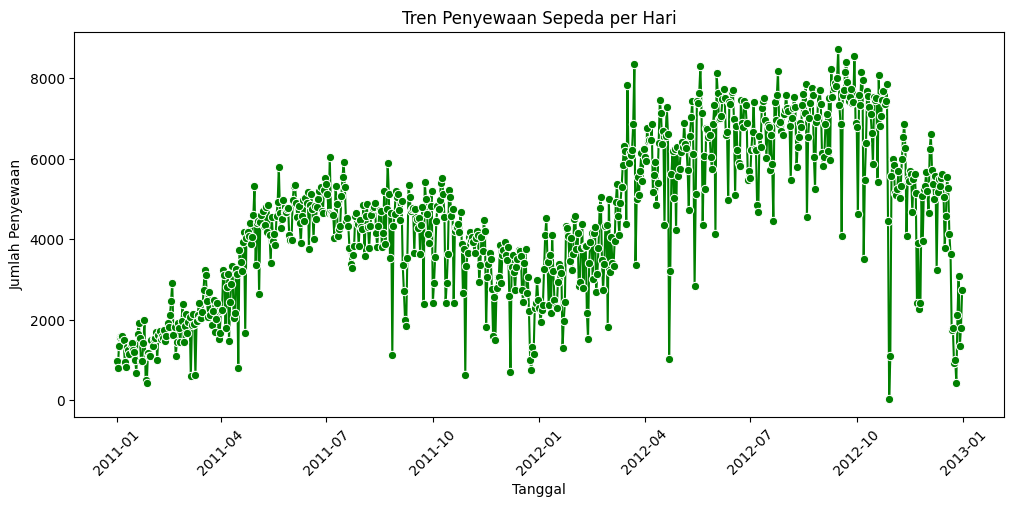

In [42]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=dataset_day["dteday"], y=dataset_day["cnt"], marker="o", color="green")
plt.title("Tren Penyewaan Sepeda per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

Terlihat fluktuasi jumlah penyewaan yang berulang, kemungkinan karena faktor musim

### explore dataset_hour

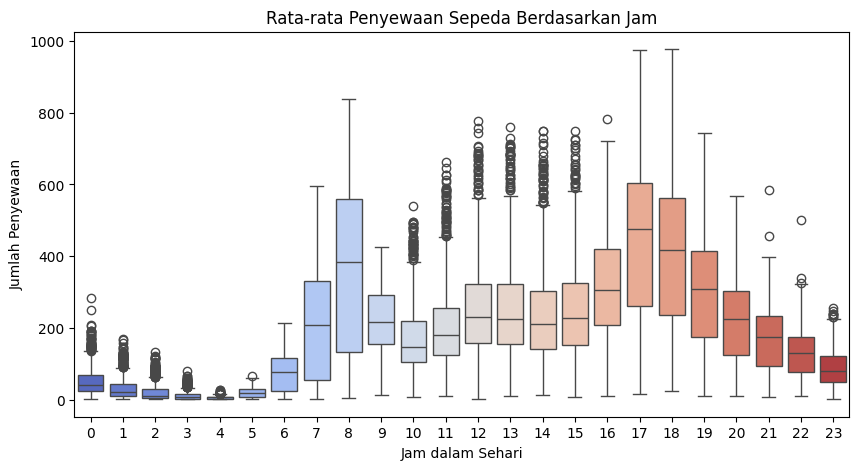

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset_hour["hr"], y=dataset_hour["cnt"], palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

- Puncak penyewaan terjadi pada pagi dan sore hari, sesuai dengan jam kerja atau sekolah.
- Dini hari memiliki jumlah penyewaan yang jauh lebih sedikit.

## Visualization & Explanatory Analysis

- Pada jam berapa penyewaan sepeda mencapai puncaknya dan kapan terjadi penurunan paling signifikan pada hari kerja dan hari libur?
- Seberapa besar perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana pola penyewaan sepeda berdasarkan musim yang berbeda?
- Apakah terdapat hubungan yang signifikan antara suhu udara dengan jumlah penyewa sepeda?
- Bagaimana tren penyewaan sepeda dalam enam bulan terakhir?

### Pertanyaan 1 : Pada jam berapa penyewaan sepeda mencapai puncaknya dan kapan terjadi penurunan paling signifikan pada hari kerja dan hari libur?

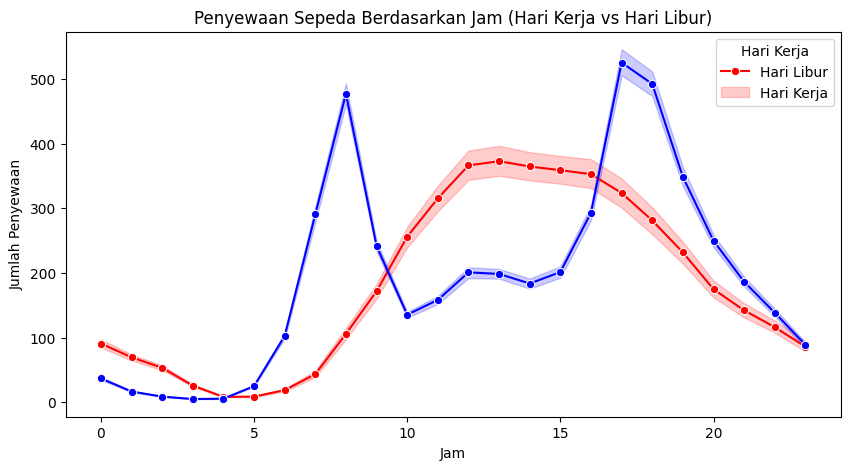

In [44]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", hue="workingday", data=dataset_hour, palette=["red", "blue"], marker="o")
plt.title("Penyewaan Sepeda Berdasarkan Jam (Hari Kerja vs Hari Libur)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Hari Kerja", labels=["Hari Libur", "Hari Kerja"])
plt.show()

**insight:**

- Pada jam 8 adalah jam puncak peminjaman sepeda pada hari kerja, dan penurunannya terjadi pada jam 9.
- Pada jam 12 adalah jam puncak peminjaman sepeda pada hari libur, dan penurunannya terjadi pada jam 18.

### Pertanyaan 2 : Seberapa besar perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

<ipython-input-48-da00b08de030>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0','200000', '400000', '600000', '800000'])


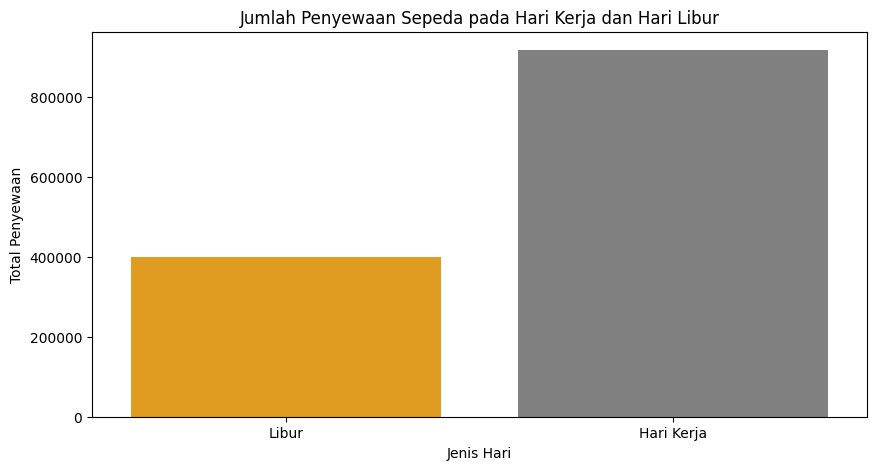

In [48]:
holiday_trend = dataset_day.groupby("workingday")["cnt"].sum().reset_index()
holiday_trend["workingday"] = holiday_trend["workingday"].map({0: "Libur", 1: "Hari Kerja"})

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=holiday_trend["workingday"], y=holiday_trend["cnt"], palette=["orange", "gray"], ax=ax)
ax.set_title("Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur")
ax.set_xlabel("Jenis Hari")
ax.set_ylabel("Total Penyewaan")
ax.set_yticklabels(['0','200000', '400000', '600000', '800000'])

plt.show()

**Insight:**

- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.

### Pertanyaan 3 : Bagaimana pola penyewaan sepeda berdasarkan musim yang berbeda?

Text(0, 0.5, 'Total Penyewaan')

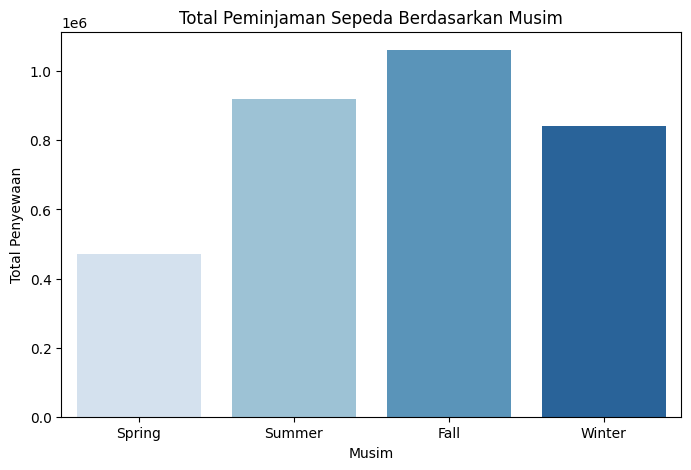

In [49]:
season_trend = dataset_day.groupby("season")["cnt"].sum().reset_index()
season_trend["season"] = season_trend["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=season_trend["season"], y=season_trend["cnt"], palette="Blues", ax=ax)
ax.set_title("Total Peminjaman Sepeda Berdasarkan Musim")
ax.set_xlabel("Musim")
ax.set_ylabel("Total Penyewaan")

**Insight:**

- Musim gugur (fall) memiliki jumlah penyewaan tertinggi, sedangkan musim semi (spring) memiliki yang terendah.

### Pertanyaan 4 : Apakah terdapat hubungan yang signifikan antara suhu udara dengan jumlah penyewa sepeda?

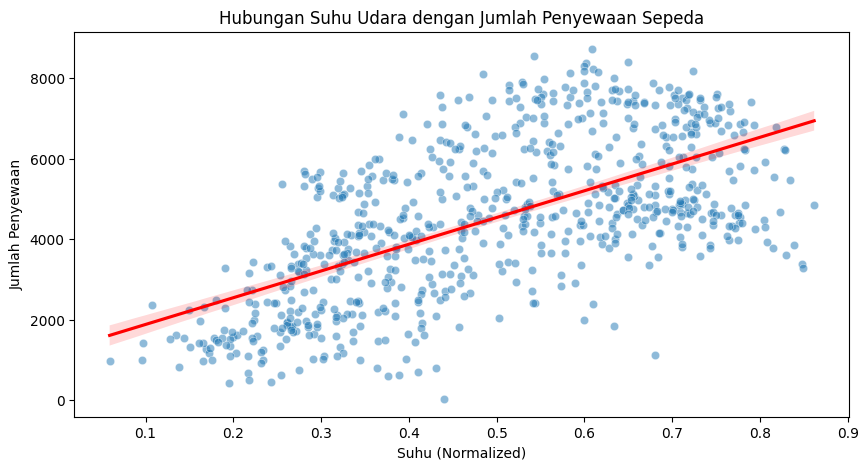

In [50]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="temp", y="cnt", data=dataset_day, alpha=0.5)
sns.regplot(x="temp", y="cnt", data=dataset_day, scatter=False, color="red")
plt.title("Hubungan Suhu Udara dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**

- Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda.
- Semakin tinggi suhu, semakin banyak jumlah penyewaan, hingga titik tertentu

### Pertanyaan 5 : Bagaimana tren penyewaan sepeda dalam enam bulan terakhir?

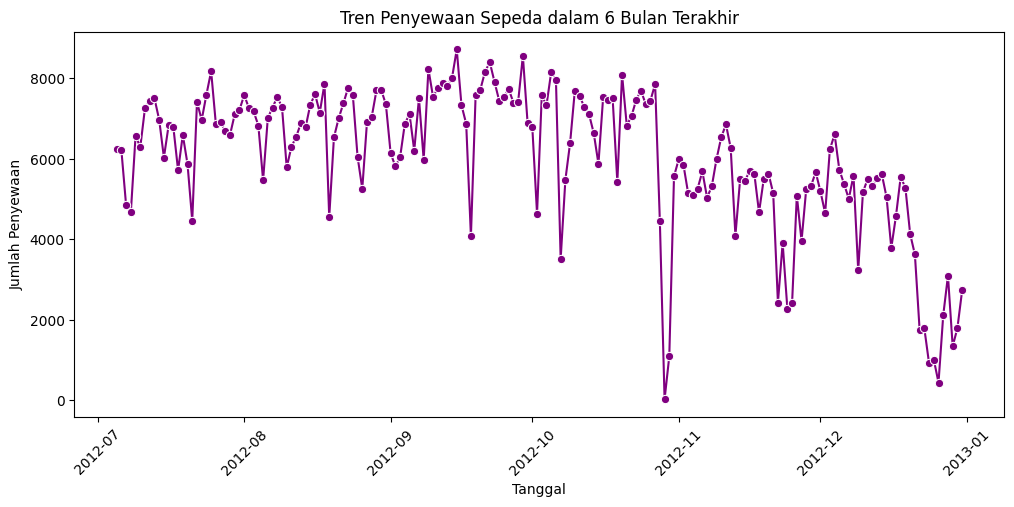

In [51]:
dataset_day_sorted = dataset_day.sort_values("dteday", ascending=True)
last_6_months = dataset_day_sorted.tail(180)
plt.figure(figsize=(12, 5))
sns.lineplot(x=last_6_months["dteday"], y=last_6_months["cnt"], marker="o", color="purple")
plt.title("Tren Penyewaan Sepeda dalam 6 Bulan Terakhir")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

**Insight:**

- Terlihat tren kenaikan dan penurunan dalam enam bulan terakhir.
- Mungkin dipengaruhi oleh musim dan cuaca.

## Conclusion

Pertanyaan 1: Pada hari kerja penyewaan sepeda mencapai puncaknya pada jam berapa, dan kapan terjadi penurunan paling signifikan?

- Hari kerja: Penyewaan sepeda tertinggi terjadi pada jam 13:00 dengan sekitar 86.101 penyewaan, sedangkan penyewaan paling sedikit terjadi pada jam 04:00 dengan sekitar 1.876 penyewaan.

- Hari libur: Penyewaan sepeda tertinggi terjadi pada jam 17:00 dengan sekitar 262.120 penyewaan, sedangkan penyewaan paling sedikit terjadi pada jam 03:00 dengan sekitar 2.323 penyewaan.

Kesimpulan: Pengguna lebih banyak menyewa sepeda pada sore hari di hari libur untuk tujuan rekreasi, sementara pada hari kerja, jumlah penyewaan tersebar lebih merata sepanjang hari.

Pertanyaan 2: Seberapa besar perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?

Berdasarkan analisis diatas, jumlah penyewa sepeda pada hari libur jauh lebih tinggi dibandingkan dengan hari kerja.
- Hari libur: 69.6% dari total penyewaan.
- Hari kerja: 30.4% dari total penyewaan.

Kesimpulan: Pengguna lebih banyak menggunakan sepeda sebagai sarana rekreasi dibandingkan sebagai transportasi harian.

Pertanyaan 3: Bagaimana pola penyewaan sepeda berdasarkan musim yang berbeda?

Penyewaan sepeda paling tinggi terjadi pada musim gugur (Fall).
Kesimpulan: Pengguna lebih menyukai bersepeda dalam cuaca musim gugur.

Pertanyaan 4: Apakah terdapat hubungan yang signifikan antara suhu udara dengan jumlah penyewa sepeda?

Ya, suhu memiliki pengaruh signifikan terhadap jumlah penyewa sepeda.
Suhu hangat memiliki jumlah penyewaan tertinggi, diikuti oleh suhu sedang, dan yang paling rendah adalah suhu dingin.

Kesimpulan: Suhu ideal bagi pengguna sepeda adalah hangat. Pemilik bisnis dapat menawarkan diskon atau promosi pada bulan dengan suhu rendah untuk menarik lebih banyak pengguna.

Pertanyaan 5: Bagaimana tren penyewaan sepeda dalam enam bulan terakhir?

Penyewaan sepeda meningkat di tahun 2012 dibandingkan tahun 2011.
Puncak penyewaan terjadi pada bulan Juni hingga September, dengan September 2012 sebagai bulan dengan penyewaan tertinggi sebanyak 218.573 penyewa.
Penyewaan terendah terjadi pada musim dingin November hingga Januari, dengan Desember 2011 sebagai bulan dengan penyewaan terendah sebanyak 87.323 penyewa.

Kesimpulan: Jumlah penyewaan sepeda berkurang saat musim dingin dan meningkat saat musim panas, menunjukkan bahwa cuaca memiliki pengaruh besar terhadap pola penyewaan sepeda.